In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict
wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:
1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
from sklearn.metrics import r2_score

In [2]:
#Load  in the data set
wind_spd_pwr = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

In [16]:
#Let's take a quick look at the data included

wind_spd_pwr. head(5)

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [17]:
wind_spd_pwr. tail(5)

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


So it looks like there are a lot a zero values from looking at the first and last 5 lines, lets take a look at the first 20 lines and see if we can get any better of an idea how the data in the power column are represented.

In [18]:
wind_spd_pwr. head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


Finally some results, these first an last 5 seem to have a caveat to them, possibly errors in the data collected. 

A quick insnull().sum() will tell us id there are any NaN or missing values in the dataset.

In [19]:
wind_spd_pwr.isnull().sum()

speed    0
power    0
dtype: int64

Looks lik a ful dataset, albeit with some odd values included in the results, as we saw above. I'm going to graph out the two columns in a scatter plot, the x-axis will reflect the speed column, and the y_axis will be the power column, a quick glance to see what the realtionship between these is.

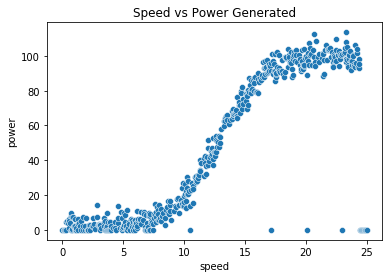

In [27]:
sns.scatterplot(x = wind_spd_pwr['speed'], y =wind_spd_pwr['power'])
plt.title("Speed vs Power Generated");

The zero values we sawin the head and tail stand out on this graph completly, for the given speed there is no value given for power, where we would expect there to be much different values. It looks like these are definitely some error in the data, we may have to remove them further down the analysis. There is clearly some for of relationship at play here.

We can fit a linear least-squares regression line to the plot as per the below:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [35]:
stats.linregress(wind_spd_pwr)

Can add each of the results as a variable and create the line on the plot?

In [33]:
slope, intercept, rvalue, pvalue, std=  stats.linregress(wind_spd_pwr)

-13.899902630519584

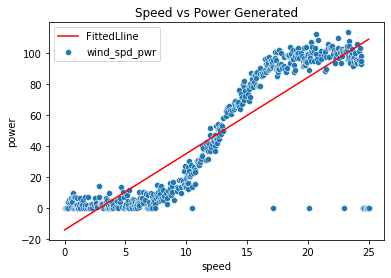

In [42]:
sns.scatterplot(x = wind_spd_pwr['speed'], y =wind_spd_pwr['power'], label = 'wind_spd_pwr')
plt.title("Speed vs Power Generated")
plt.plot(x, (slope*x + intercept), 'r', label = 'FittedLline')
plt.legend();

The output *rvalue* of stats.linregress() will provide us with the coefficient of correlation, commonly called $r$, which will range from -1 to 1, where 0 means ther is no relationship and 1 & -1 mean there is a 100% relationship. At this point it is worth noting that the fitted line is not a great for to the data, if we were to use the line as a guide on the dataset alone, we would find values which would fall outside the shape of the dataset.

In [43]:
#Print the rvalue of the dataset
rvalue

0.8537775037188595

In [46]:
# Split out our dataset into 2 variables, X & y, where X is the input and y is the output of our predictor.
X = wind_spd_pwr.iloc[:, :1].values
y = wind_spd_pwr.iloc[:, 1:].values

In [7]:
# Let's view these values and see if we ahve split these out as desired.
X

array([[ 0.   ],
       [ 0.125],
       [ 0.15 ],
       [ 0.225],
       [ 0.275],
       [ 0.325],
       [ 0.4  ],
       [ 0.45 ],
       [ 0.501],
       [ 0.526],
       [ 0.551],
       [ 0.576],
       [ 0.626],
       [ 0.676],
       [ 0.701],
       [ 0.726],
       [ 0.751],
       [ 0.801],
       [ 0.826],
       [ 0.851],
       [ 0.926],
       [ 0.951],
       [ 0.976],
       [ 1.001],
       [ 1.026],
       [ 1.051],
       [ 1.076],
       [ 1.101],
       [ 1.151],
       [ 1.251],
       [ 1.276],
       [ 1.301],
       [ 1.401],
       [ 1.426],
       [ 1.502],
       [ 1.552],
       [ 1.652],
       [ 1.677],
       [ 1.702],
       [ 1.827],
       [ 1.877],
       [ 1.902],
       [ 2.027],
       [ 2.077],
       [ 2.102],
       [ 2.177],
       [ 2.227],
       [ 2.252],
       [ 2.402],
       [ 2.477],
       [ 2.553],
       [ 2.578],
       [ 2.703],
       [ 2.828],
       [ 2.853],
       [ 2.953],
       [ 3.003],
       [ 3.028],
       [ 3.053

In [9]:
y

array([[0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [4.33100e+00],
       [5.18600e+00],
       [3.82600e+00],
       [1.04800e+00],
       [5.55300e+00],
       [6.49800e+00],
       [5.24100e+00],
       [4.22000e+00],
       [7.97400e+00],
       [9.74600e+00],
       [0.00000e+00],
       [0.00000e+00],
       [7.27100e+00],
       [7.95000e-01],
       [7.35000e+00],
       [1.99600e+00],
       [1.60900e+00],
       [2.06400e+00],
       [6.51100e+00],
       [0.00000e+00],
       [2.08500e+00],
       [0.00000e+00],
       [1.21000e-01],
       [1.20800e+00],
       [3.37300e+00],
       [6.51000e+00],
       [0.00000e+00],
       [4.15600e+00],
       [2.00500e+00],
       [5.35200e+00],
       [0.00000e+00],
       [7.22100e+00],
       [0.00000e+00],
       [2.43900e+00],
       [0.00000e+00],
       [2.35900e+00],
       [7.04800e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [2.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [11]:
lin_reg = LinearRegression()

In [12]:
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lin_pred = lin_reg.predict(x_test)

In [14]:
r2_score(y_test, lin_pred)

0.7066904808136409